In [16]:
import numpy as np

def policy(matrix, weight):
    weighted_matrix = matrix.dot(weight)
    input_exp = np.exp(weighted_matrix)
    policy = input_exp / np.sum(input_exp)

    return policy

In [17]:
#!/usr/bin/env python3
"""
Main file
"""
import numpy as np
# from policy_gradient import policy


weight = np.ndarray((4, 2), buffer=np.array([
    [4.17022005e-01, 7.20324493e-01],
    [1.14374817e-04, 3.02332573e-01],
    [1.46755891e-01, 9.23385948e-02],
    [1.86260211e-01, 3.45560727e-01]
    ]))
state = np.ndarray((1, 4), buffer=np.array([
    [-0.04428214,  0.01636746,  0.01196594, -0.03095031]
    ]))

res = policy(state, weight)
print(res)


[[0.50351642 0.49648358]]


In [39]:
import numpy as np

def softmax_grad(softmax):
    s = softmax.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

def policy_gradient(state, weight):
    weighted_matrix = state.dot(weight)
    input_exp = np.exp(weighted_matrix)
    softmax_output = input_exp / np.sum(input_exp)

    action = np.argmax(softmax_output)
    dsoftmax = softmax_grad(softmax_output)[action, :]
    dlog = dsoftmax / softmax_output[0, action]
    gradient = state.T.dot(dlog[None, :])

    return action, gradient

In [40]:
#!/usr/bin/env python3
"""
Main file
"""
import gym
import numpy as np
# from policy_gradient import policy_gradient

env = gym.make('CartPole-v1')
np.random.seed(1)

weight = np.random.rand(4, 2)
state = env.reset()[None,:]
print(weight)
print(state)

action, grad = policy_gradient(state, weight)
print(action)
print(grad)

env.close()

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]]
[[ 0.02914771  0.00652478 -0.03260821 -0.00882974]]
1
[[-0.01449239  0.01449239]
 [-0.00324415  0.00324415]
 [ 0.01621296 -0.01621296]
 [ 0.00439019 -0.00439019]]


In [75]:
import numpy as np

def train(env, nb_episodes, alpha=0.000045, gamma=0.98):
    n_states = env.observation_space.shape[0]
    n_actions = env.action_space.n
    weight = np.random.rand(n_states, n_actions)

    scores = []

    for episode in range(nb_episodes + 1):
        state = env.reset()[None, :]
        grads = []
        rewards = []
        score = 0

        done = False

        while not done:
            action, grad = policy_gradient(state, weight)

            next_state, reward, done, _ = env.step(action)

            grads.append(grad)
            rewards.append(reward)

            score += reward
            state = next_state[None, :]

        scores.append(score)

        for i in range(len(rewards) - 2, -1, -1):
            rewards[i] += rewards[i + 1] * gamma

        for grad, reward in zip(grads, rewards):
            weight += alpha * grad * reward

        print("Episode: {}, Score: {}".format(episode, score), end="\r", flush=False)

    return scores

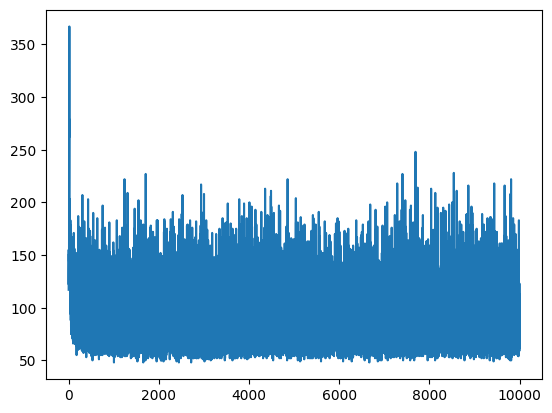

In [76]:
#!/usr/bin/env python3
"""
Main file
"""
import gym
import matplotlib.pyplot as plt
import numpy as np

# from train import train

env = gym.make('CartPole-v1')

scores = train(env, 10000)

plt.plot(np.arange(len(scores)), scores)
plt.show()
env.close()

In [77]:
import numpy as np

def train1(env, nb_episodes, alpha=0.000045, gamma=0.98, show_result=False):
    n_states = env.observation_space.shape[0]
    n_actions = env.action_space.n
    weight = np.random.rand(n_states, n_actions)

    scores = []

    for episode in range(nb_episodes + 1):
        state = env.reset()[None, :]
        grads = []
        rewards = []
        score = 0

        done = False

        while not done:
            action, grad = policy_gradient(state, weight)

            next_state, reward, done, _ = env.step(action)

            grads.append(grad)
            rewards.append(reward)

            score += reward
            state = next_state[None, :]

        scores.append(score)

        for i in range(len(rewards) - 2, -1, -1):
            rewards[i] += rewards[i + 1] * gamma

        for grad, reward in zip(grads, rewards):
            weight += alpha * grad * reward

        print("Episode: {}, Score: {}".format(episode, score), end="\r", flush=False)

        if show_result and episode % 1000 == 0:
            env.render()

    return scores

In [78]:
#!/usr/bin/env python3
"""
Main file
"""
import gym

# from train import train

env = gym.make('CartPole-v1')

scores = train1(env, 10000, 0.000045, 0.98, True)

env.close()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym